<a href="https://colab.research.google.com/github/manmeetdhawan/manmeetdhawan/blob/Main/Banking_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [182]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [183]:
train=pd.read_csv('/content/bank-full_train.csv')
test=pd.read_csv('/content/bank-full_test.csv')
train=train.drop(['ID'],axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        31647 non-null  int64 
 1   job        31647 non-null  object
 2   marital    31647 non-null  object
 3   education  31647 non-null  object
 4   default    31647 non-null  object
 5   balance    31647 non-null  int64 
 6   housing    31647 non-null  object
 7   loan       31647 non-null  object
 8   contact    31647 non-null  object
 9   day        31647 non-null  int64 
 10  month      31647 non-null  object
 11  duration   31647 non-null  int64 
 12  campaign   31647 non-null  int64 
 13  pdays      31647 non-null  int64 
 14  previous   31647 non-null  int64 
 15  poutcome   31647 non-null  object
 16  y          31647 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB


In [184]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,45,blue-collar,married,secondary,no,2,no,no,cellular,26,aug,105,10,-1,0,unknown,no
1,34,admin.,divorced,secondary,no,0,no,no,cellular,10,jul,268,1,-1,0,unknown,no
2,40,technician,divorced,secondary,no,311,no,no,cellular,6,aug,738,2,-1,0,unknown,yes
3,58,self-employed,married,tertiary,no,5810,no,no,cellular,12,mar,139,1,-1,0,unknown,yes
4,59,blue-collar,married,secondary,no,169,yes,no,unknown,16,may,181,3,-1,0,unknown,no


In [185]:
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,ID
0,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,3
1,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,4
2,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,6
3,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,7
4,58,technician,married,unknown,no,71,yes,no,unknown,5,may,71,1,-1,0,unknown,14


In [186]:
train.shape,test.shape

((31647, 17), (13564, 17))

**EDA**


*Heatmap to understand the correlation*

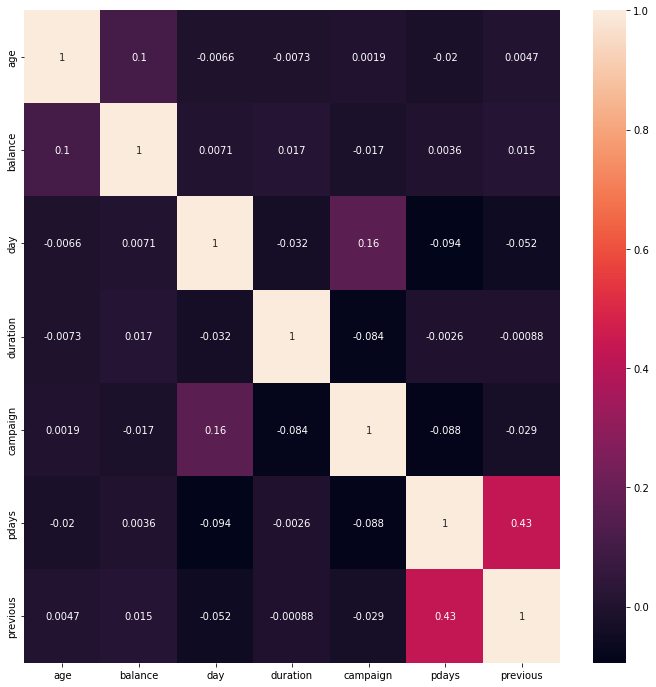

In [187]:

plt.subplots(figsize=(12,12))
sns.heatmap(train.corr(), annot=True)
plt.show()

**Feature** :Age (numeric column)

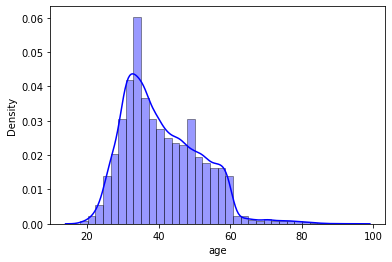

In [188]:
sns.distplot(train['age'], hist=True, kde=True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

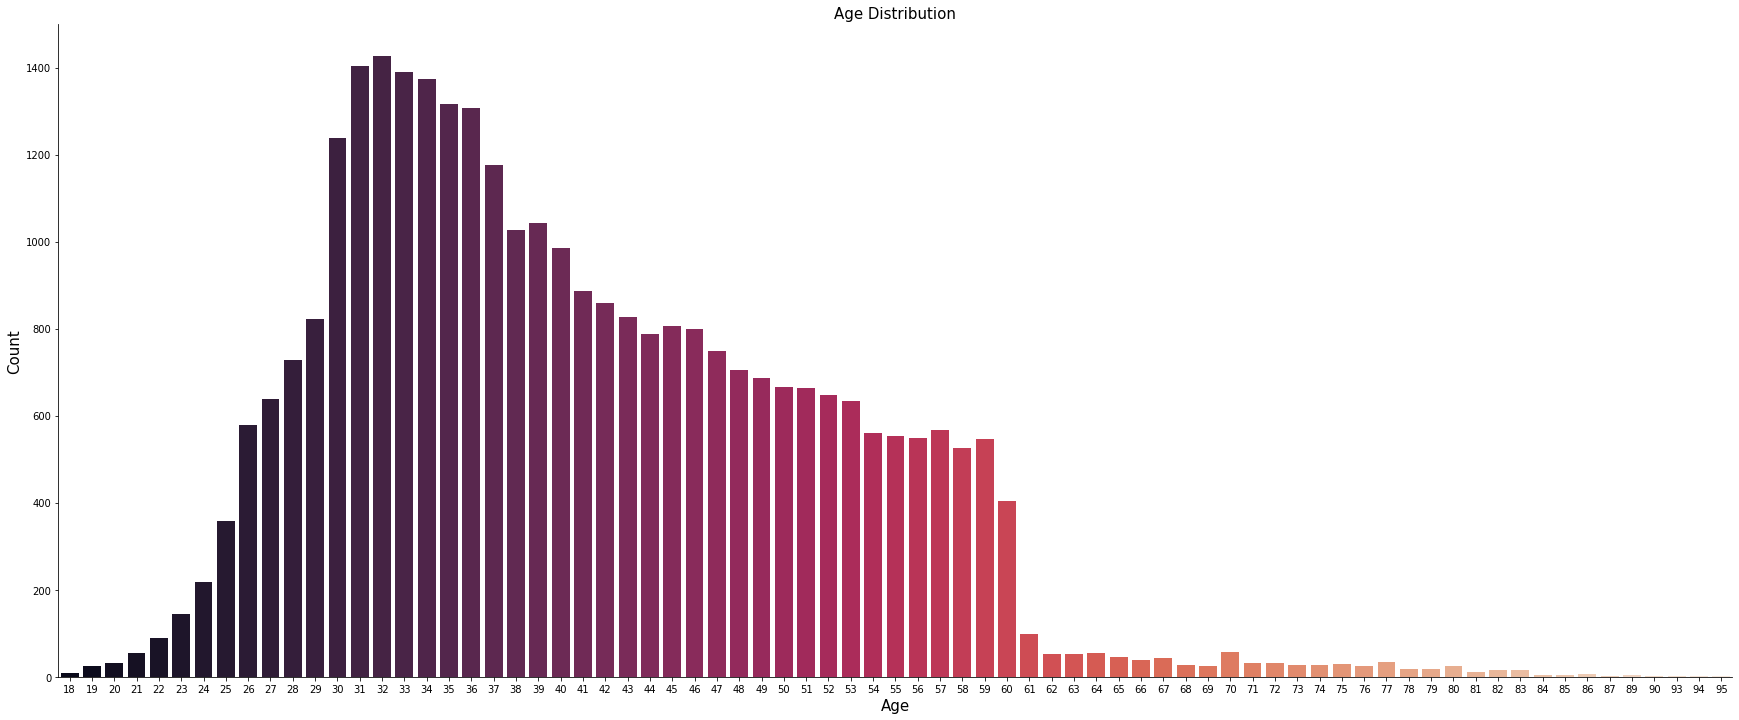

In [189]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 12)
sns.countplot(x = 'age',  palette="rocket", data = train)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Distribution', fontsize=15)
sns.despine()

**Job :** Categorical feature

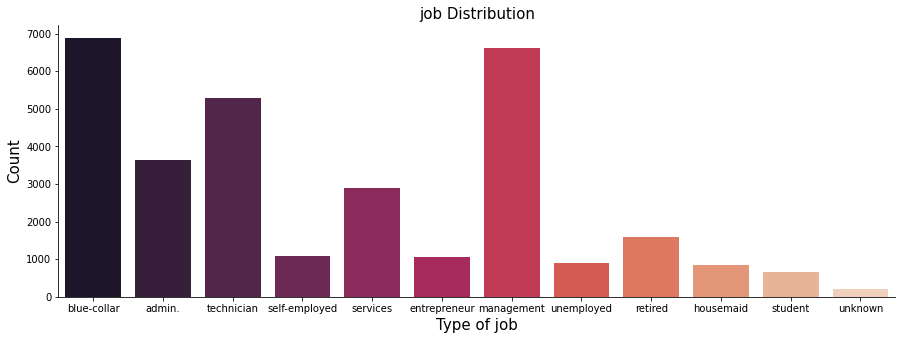

In [190]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'job',  palette="rocket", data = train)
ax.set_xlabel('Type of job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('job Distribution', fontsize=15)
sns.despine()

**Feature: Highest Education(Categorical)**

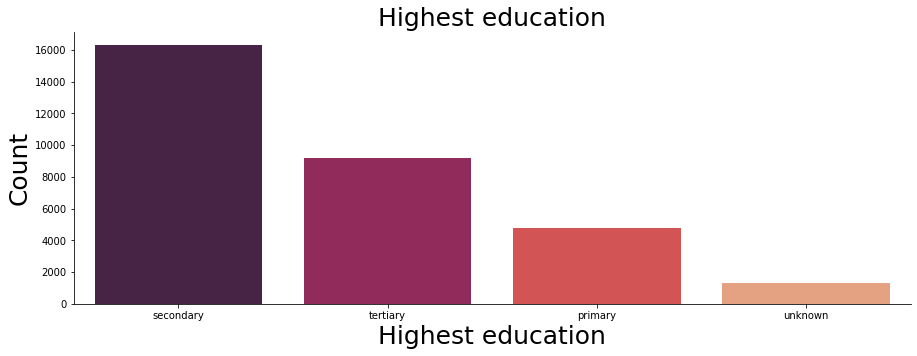

In [191]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'education',  palette="rocket", data = train)
ax.set_xlabel('Highest education', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('Highest education', fontsize=25)
sns.despine()


**Feature: Credit In Default(Categorical)**

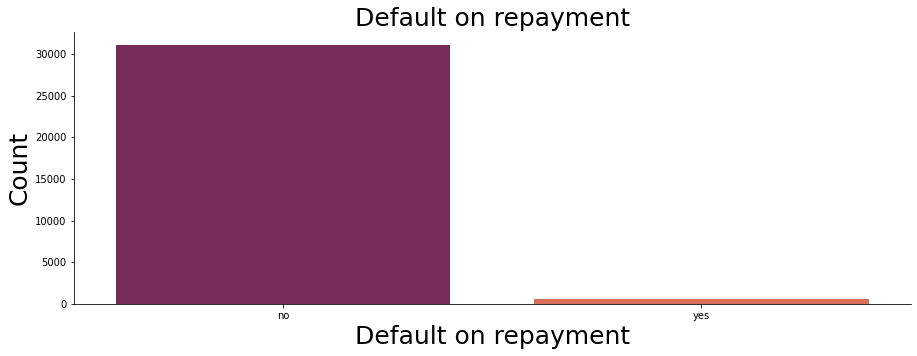

In [192]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'default',  palette="rocket", data = train)
ax.set_xlabel('Default on repayment', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('Default on repayment', fontsize=25)
sns.despine()


**Feature: Marital Status(Categorical)**

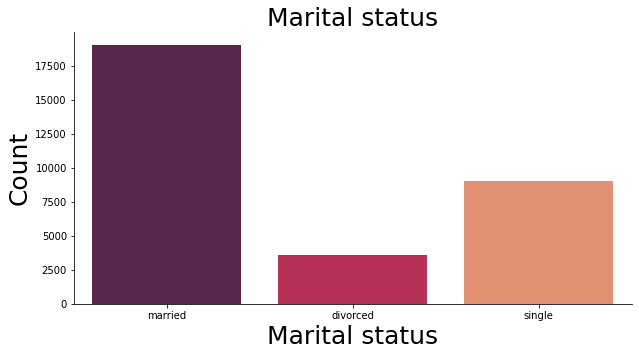

In [193]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital',  palette="rocket", data = train)
ax.set_xlabel('Marital status', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('Marital status', fontsize=25)
sns.despine()


**Feature: Loan?(Categorical)**

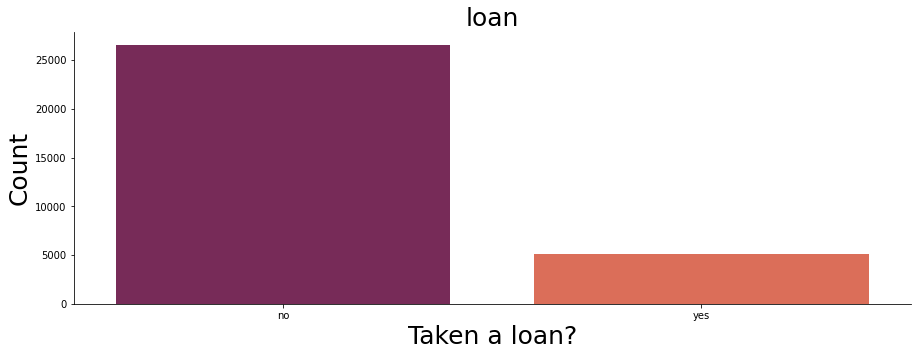

In [194]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'loan',  palette="rocket", data = train)
ax.set_xlabel('Taken a loan?', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('loan', fontsize=25)
sns.despine()

**Feature: Housing(Categorical**)

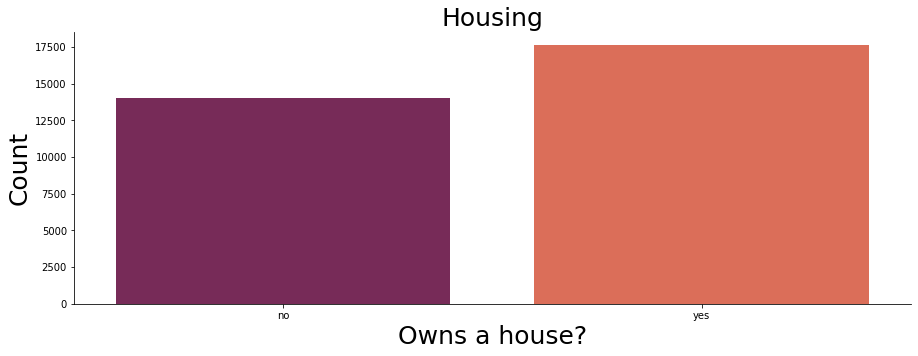

In [195]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'housing',  palette="rocket", data = train)
ax.set_xlabel('Owns a house?', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('Housing', fontsize=25)
sns.despine()

**Feature: Contact(Categorical)**

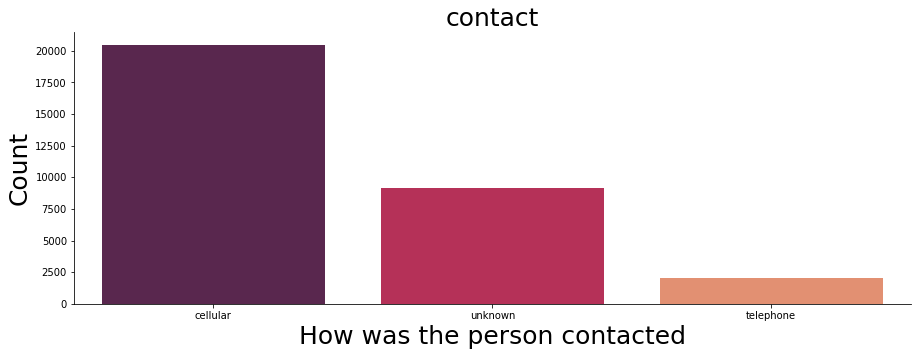

In [196]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'contact',  palette="rocket", data = train)
ax.set_xlabel('How was the person contacted', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('contact', fontsize=25)
sns.despine()

**Feature: Month!(Categorical)**

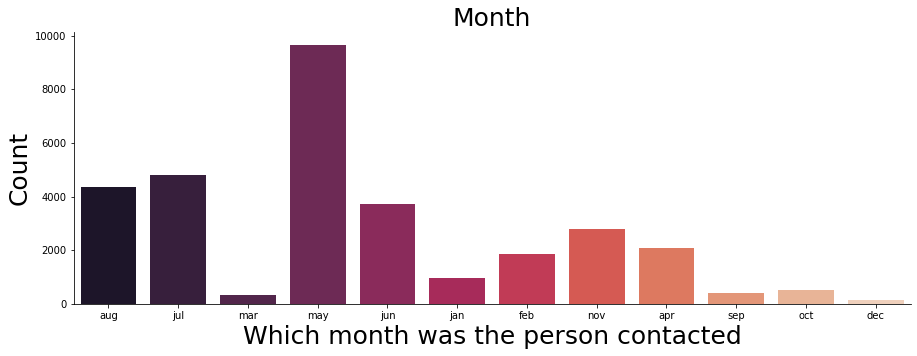

In [197]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'month',  palette="rocket", data = train)
ax.set_xlabel('Which month was the person contacted', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('Month', fontsize=25)
sns.despine()

**Feature: Duration(Numeric)**

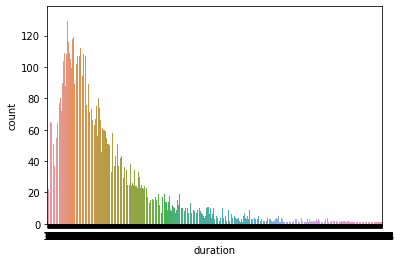

In [198]:

sns.countplot(x='duration',data=train)


**Campaign(Numeric)**

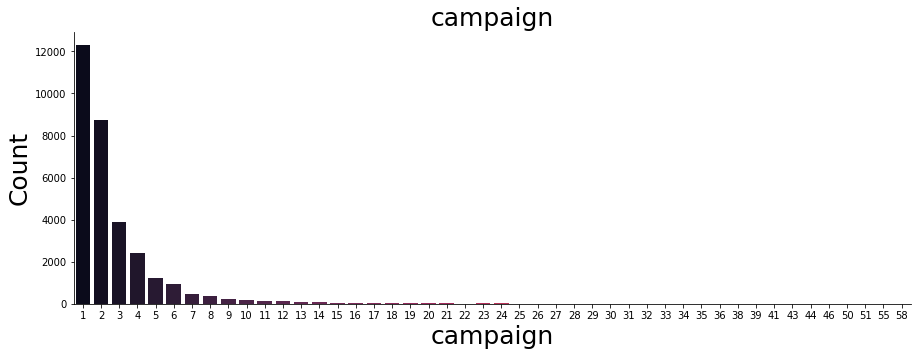

In [199]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'campaign',  palette="rocket", data = train)
ax.set_xlabel('campaign', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('campaign', fontsize=25)
sns.despine()

**Data Preprocessing:**

Commented out the remove outlier function for age since getting better accuracy without that

In [200]:
#  def remove_outlier(df_in, col_name):
#      q1 = df_in[col_name].quantile(0.25)
#      q3 = df_in[col_name].quantile(0.75)
#      iqr = q3-q1 
#      fence_low  = q1-1.5*iqr
#      fence_high = q3+1.5*iqr
#      df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
#      print('IQR lower bound and upper bound are', fence_low, 'and', fence_high, 'respectively')
#      return df_out
#  train= remove_outlier(train, 'age')

In [201]:
def age(dataframe):
    q1 = dataframe['age'].quantile(0.25)
    q2 = dataframe['age'].quantile(0.50)
    q3 = dataframe['age'].quantile(0.75)
    dataframe.loc[(dataframe['age'] <= q1), 'age'] = 1
    dataframe.loc[(dataframe['age'] > q1) & (dataframe['age'] <= q2), 'age'] = 2
    dataframe.loc[(dataframe['age'] > q2) & (dataframe['age'] <= q3), 'age'] = 3
    dataframe.loc[(dataframe['age'] > q3), 'age'] = 4 
    print (q1, q2, q3)
    return dataframe
age(train);
age(test);

33.0 39.0 48.0
33.0 39.0 48.0


**Label Encoding all the categorical features..**

In [202]:
def labelenc(df):
     from sklearn.preprocessing import LabelEncoder
     labelencoder_X = LabelEncoder()
     labelencoder_X.fit(df['job'])
     df['job'] = labelencoder_X.transform(df['job'])
     labelencoder_X.fit(df['marital'])
     df['marital'] = labelencoder_X.transform(df['marital'])
     labelencoder_X.fit(df['education'])
     df['education'] = labelencoder_X.transform(df['education'])
     labelencoder_X.fit(df['default'])
     df['default'] = labelencoder_X.transform(df['default'])
     labelencoder_X.fit(df['loan'])
     df['loan'] = labelencoder_X.transform(df['loan'])
     labelencoder_X.fit(df['housing'])
     df['housing'] = labelencoder_X.transform(df['housing'])
     labelencoder_X.fit(df['contact'])
     df['contact'] = labelencoder_X.transform(df['contact'])
     labelencoder_X.fit(df['month'])
     df['month'] = labelencoder_X.transform(df['month'])
     return df

labelenc(train)
labelenc(test)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,ID
0,1,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,unknown,3
1,3,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,unknown,4
2,2,4,1,2,0,231,1,0,2,5,8,139,1,-1,0,unknown,6
3,1,4,2,2,0,447,1,1,2,5,8,217,1,-1,0,unknown,7
4,4,9,1,3,0,71,1,0,2,5,8,71,1,-1,0,unknown,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,4,5,1,1,0,1146,0,0,0,16,9,212,1,187,6,success,45196
13560,2,4,2,1,0,1511,1,0,0,16,9,270,1,-1,0,unknown,45198
13561,2,1,2,1,0,1475,1,0,0,16,9,1166,3,530,12,other,45200
13562,4,4,1,2,0,583,0,0,0,17,9,226,1,184,4,success,45202


In [203]:
def remove_outlier_upper(df_in, col_name):
  q1 = df_in[col_name].quantile(0.25)
  q3 = df_in[col_name].quantile(0.75)
  iqr = q3-q1 #Interquartile range
  fence_low  = q1-1.5*iqr
  fence_high = q3+1.5*iqr
  df_out = df_in.loc[(df_in[col_name] > 0) & (df_in[col_name] < fence_high)]
  print('IQR lower bound and upper bound are 0 and', fence_high, 'respectively')
  return df_out
  
  train= remove_outlier_upper(train, 'duration')

In [204]:
def duration(dataframe):
    q1 = dataframe['duration'].quantile(0.25)
    q2 = dataframe['duration'].quantile(0.50)
    q3 = dataframe['duration'].quantile(0.75)
    dataframe.loc[(dataframe['duration'] <= q1), 'duration'] = 1
    dataframe.loc[(dataframe['duration'] > q1) & (dataframe['duration'] <= q2), 'duration'] = 2
    dataframe.loc[(dataframe['duration'] > q2) & (dataframe['duration'] <= q3), 'duration'] = 3
    dataframe.loc[(dataframe['duration'] > q3), 'duration'] = 4 
    print (q1, q2, q3)
    return dataframe
duration(train)
duration(test)

103.0 181.0 320.0
103.0 178.0 316.0


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,ID
0,1,2,1,1,0,2,1,1,2,5,8,1,1,-1,0,unknown,3
1,3,1,1,3,0,1506,1,0,2,5,8,1,1,-1,0,unknown,4
2,2,4,1,2,0,231,1,0,2,5,8,2,1,-1,0,unknown,6
3,1,4,2,2,0,447,1,1,2,5,8,3,1,-1,0,unknown,7
4,4,9,1,3,0,71,1,0,2,5,8,1,1,-1,0,unknown,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,4,5,1,1,0,1146,0,0,0,16,9,3,1,187,6,success,45196
13560,2,4,2,1,0,1511,1,0,0,16,9,3,1,-1,0,unknown,45198
13561,2,1,2,1,0,1475,1,0,0,16,9,4,3,530,12,other,45200
13562,4,4,1,2,0,583,0,0,0,17,9,3,1,184,4,success,45202


In [205]:
#train = pd.get_dummies(data = train, columns = ['poutcome'] , prefix = ['poutcome'] , drop_first = True)
#test= pd.get_dummies(data=test,columns=['poutcome'],prefix=['poutcome'],drop_first=True)

In [206]:
train['poutcome'].replace(['unknown', 'failure', 'other', 'success'], [1,2,3,4], inplace  = True)
test['poutcome'].replace(['unknown', 'failure', 'other', 'success'], [1,2,3,4], inplace  = True)

In [207]:
train['poutcome']

0        1
1        1
2        1
3        1
4        1
        ..
31642    1
31643    4
31644    1
31645    1
31646    1
Name: poutcome, Length: 31647, dtype: int64

In [208]:
train['poutcome'].dtypes

dtype('int64')

In [209]:
test['poutcome'].unique()

array([1, 2, 3, 4])

In [210]:
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,ID
0,1,2,1,1,0,2,1,1,2,5,8,1,1,-1,0,1,3
1,3,1,1,3,0,1506,1,0,2,5,8,1,1,-1,0,1,4
2,2,4,1,2,0,231,1,0,2,5,8,2,1,-1,0,1,6
3,1,4,2,2,0,447,1,1,2,5,8,3,1,-1,0,1,7
4,4,9,1,3,0,71,1,0,2,5,8,1,1,-1,0,1,14


In [211]:
print(train['pdays'].nunique())

511


In [212]:
train.loc[(train['pdays'] == 999), 'pdays'] = 1
train.loc[(train['pdays'] > 0) & (train['pdays'] <= 10), 'pdays'] = 2
train.loc[(train['pdays'] > 10) & (train['pdays'] <= 20), 'pdays'] = 3
train.loc[(train['pdays'] > 20) & (train['pdays'] != 999), 'pdays'] = 4

In [213]:
test.loc[(test['pdays'] == 999), 'pdays'] = 1
test.loc[(test['pdays'] > 0) & (test['pdays'] <= 10), 'pdays'] = 2
test.loc[(test['pdays'] > 10) & (test['pdays'] <= 20), 'pdays'] = 3
test.loc[(test['pdays'] > 20) & (test['pdays'] != 999), 'pdays'] = 4

In [214]:
train['pdays'].unique()

array([-1,  4,  3,  2])

In [215]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,3,1,1,1,0,2,0,0,0,26,1,2,10,-1,0,1,no
1,2,0,0,1,0,0,0,0,0,10,5,3,1,-1,0,1,no
2,3,9,0,1,0,311,0,0,0,6,1,4,2,-1,0,1,yes
3,4,6,1,2,0,5810,0,0,0,12,7,2,1,-1,0,1,yes
4,4,1,1,1,0,169,1,0,2,16,8,2,3,-1,0,1,no


**MODELING**

In [216]:
from sklearn.model_selection import train_test_split
X = train.drop('y', axis=1)
y = train['y']
y.replace(['yes','no'],[1,0],inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [217]:
#Using Logistic 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)
print(accuracy_score(y_test, logpred)*100)

#Using Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
rfc = RandomForestClassifier(n_estimators = 1000)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)
print(accuracy_score(y_test, rfcpred)*100)

87.7567140600316
89.63665086887835


**GRADIENT BOOSTING**

In [218]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score 
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)

print(accuracy_score(y_test, gbkpred)*100)

89.93680884676145


**XG-BOOST**

In [219]:
from xgboost import XGBClassifier


model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [220]:
modelpred=model.predict(X_test)
print(accuracy_score(y_test,modelpred)*100)

90.0


Since we are getting better results with Xgb model

In [225]:
test_no_id=test.drop('ID',axis=1)

In [226]:
test_predictions = model.predict(test_no_id)

In [227]:
id= test['ID']
submission_df_1 = pd.DataFrame({"ID": id,"y": test_predictions})
submission_df_1['y'].replace([1,0], ['yes','no'], inplace  = True)

In [228]:
submission_df_1.to_csv('submission_1.csv', index=False)